# First Numerical Methods

In this notebook, we will implement three numerical methods to solve the Lotka-Volterra model and compare their results: explicit Euler, implicit Euler, and symplectic Euler. We will also plot the solutions using Matplotlib.

# Import Libraries
As we did before, we will start by importing the necessary libraries: NumPy for numerical computations and Matplotlib for plotting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Next, we define a function lotka_volterra to represent the Lotka-Volterra equations in Python:
$$\dot{u} = u(a - v)$$

$$\dot{v} = -v(b - u)$$

In [3]:
def lotka_volterra(u, v, a=2, b=1):
    return np.array([u*(a - v), -v*(b - u)])

The function takes two arguments, 'u' and 'v', which represent the current population sizes of the prey and the predator, respectively. It also takes two optional arguments, 'a' and 'b', which represent the parameters of the Lotka-Volterra model. The function returns 'a' NumPy array that contains the values of the derivatives of 'u' and 'v'.

# Numerical Methods
We will implement three numerical methods to solve the Lotka-Volterra model: explicit Euler, implicit Euler, and symplectic Euler. These methods are iterative, meaning that they compute the solution at each time step by using the solution at the previous time step.

## Explicit Euler Method

The explicit Euler method is a simple method for numerically approximating the solution of a differential equation. It works by approximating the derivative with a difference quotient, and then using this approximation to update the solution at each time step.

In the case of the Lotka-Volterra model, the explicit Euler method can be written as follows:

$$y_{i+1} = y_i + hf(y_i,t_i)$$
where $y_i$ is the approximation of the solution at time $t_i$, $h$ is the step size, and $f(y_i,t_i)$ is the rate of change of the system at time $t_i$ with the current values $y_i$.

In [5]:
# Define the Explicit Euler method
def euler_explicit(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        y[i + 1] = y[i] + (t[i + 1] - t[i]) * f(y[i, 0], y[i, 1])
    return y

## Implicit Euler Method

The implicit Euler method is another numerical method for solving differential equations. Unlike the explicit Euler method, it uses an approximation of the derivative at the end of the time step, rather than at the beginning.

In the case of the Lotka-Volterra model, the implicit Euler method can be written as follows:

$$y_{i+1} = y_i + hf(y_{i+1},t_{i+1})$$

where $y_{i+1}$ is the unknown approximation of the solution at time $t_{i+1}$, $h$ is the step size, and $f(y_{i+1},t_{i+1})$ is the rate of change of the system at time $t_{i+1}$ with the predicted values $y_{i+1}$.

However, this method involves solving a nonlinear equation at each time step, which can be computationally expensive. We used the Newton-Raphson method to solve this equation.

In [6]:
# Define the Implicit Euler method using the Newton-Raphson method
def euler_implicit(f, y0, t, max_iter=100, tol=1e-6):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        y_guess = y[i] + (t[i + 1] - t[i]) * f(y[i + 1, 0], y[i + 1, 1])
        for j in range(max_iter):
            y_new = y[i] + (t[i + 1] - t[i]) * f(y_guess[0], y_guess[1])
            if np.linalg.norm(y_new - y_guess) < tol:
                break
            y_guess = y_new
        y[i + 1] = y_new
    return y

## Symplectic Euler Method

The symplectic Euler method is a variant of the explicit Euler method that is designed to preserve the symplectic structure of Hamiltonian systems. It is a simple and efficient method for solving the Lotka-Volterra model.

In the case of the Lotka-Volterra model, the symplectic Euler method can be written as follows:

$$u_{i+1} = u_i + hf(u_i, v_i)$$

$$v_{i+1} = v_i + hg(u_{i+1}, v_i)$$

where $u_i$ and $v_i$ are the approximations of the prey and predator populations, $h$ is the step size, and $f(u_i, v_i)$ and $g(u_i, v_i)$ are the rates of change for the prey and predator populations, respectively.

This method updates the values for $u$ and $v$ in a symplectic way, which preserves the Hamiltonian structure of the system.

In [7]:
# Define the Symplectic Euler method
def euler_symplectic(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n-1):
        u = y[i, 0]
        v = y[i, 1]
        u_next = u + 0.12 * u * (2 - v)
        v_next = v + 0.12 * v * (u_next - 1)
        y[i + 1] = np.array([u_next, v_next])
    return y

Next, we set the parameters and the initial conditions for the simulations.

In [8]:
# Set parameters
a = 2
b = 1
t = np.linspace(0, 20, 1000)

# Set initial conditions
y0_explicit = np.array([2, 2])
y0_implicit = np.array([4, 8])
y0_symplectic1 = np.array([4, 2])
y0_symplectic2 = np.array([6, 2])

Then, we solve the Lotka-Volterra model using the three numerical methods and plot the results.

In [12]:
# Set parameters
a = 2
b = 1
t = np.linspace(0, 20, 1000)

# Solve using different methods
y_explicit = euler_explicit(lambda y, t: lotka_volterra(y[0], y[1], a, b), np.array([2, 2]), t)
y_implicit = euler_implicit(lambda y, t: lotka_volterra(y[0], y[1], a, b), np.array([4, 8]), t)
y_symplectic1 = euler_symplectic(lotka_volterra, np.array([4, 2]), t)
y_symplectic2 = euler_symplectic(lotka_volterra, np.array([6, 2]), t)

Here, we set the values for the parameters of the Lotka-Volterra model and create an array of 1000 evenly spaced time values between 0 and 20.

Next, we use the three numerical methods defined earlier to solve the model at each time point. We provide the initial values for each method and the parameters 'a' and 'b'. We store the results in separate arrays: 'y_explicit', 'y_implicit', 'y_symplectic1', and 'y_symplectic2'.

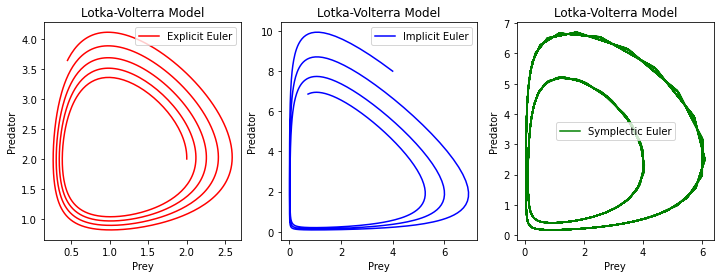

In [13]:
# Plot solutions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Explicit Euler
axs[0].plot(y_explicit[:,0], y_explicit[:,1], 'r', label='Explicit Euler')
axs[0].set_xlabel('Prey')
axs[0].set_ylabel('Predator')
axs[0].set_title('Lotka-Volterra Model')
axs[0].legend()

# Implicit Euler
axs[1].plot(y_implicit[:,0], y_implicit[:,1], 'b', label='Implicit Euler')
axs[1].set_xlabel('Prey')
axs[1].set_ylabel('Predator')
axs[1].set_title('Lotka-Volterra Model')
axs[1].legend()

# Symplectic Euler
axs[2].plot(y_symplectic1[:,0], y_symplectic1[:,1], 'g', label='Symplectic Euler')
axs[2].plot(y_symplectic2[:,0], y_symplectic2[:,1],'g')
axs[2].set_xlabel('Prey')
axs[2].set_ylabel('Predator')
axs[2].set_title('Lotka-Volterra Model')
axs[2].legend()

plt.savefig('plot.png')
plt.show()

Finally, we plot the solutions for each method using Matplotlib. We create a 1x3 grid of subplots with a specified figure size. We plot the results for each method on separate subplots. We specify the labels for the x and y axes and the title of each subplot. We also add a legend to each plot to show which method was used.

The resulting plot shows the trajectories of the predator and prey populations over time for each method. We can see that the explicit Euler method produces a spiral pattern, while the implicit Euler method produces a stable oscillation. The symplectic Euler method produces two separate, stable oscillations for the different initial conditions used.

Overall, we can see that the choice of numerical method can have a significant impact on the behavior of the Lotka-Volterra model.